# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
df = pd.read_csv('/content/bank transaction segmentation.csv')
df

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionGapDate,DeviceUsage,IPUsage,AmountRatio,TotalSaldo,MerchantPreference,Binned_Amount,Cluster
0,-0.592378,0.0,0.75,-0.5,0.78125,-0.500000,-0.321429,0.0,0.061009,0.467742,0.666667,-1.0,-0.368297,0.083071,0.0,-0.333333,0
1,0.496329,0.0,-0.30,-0.5,0.71875,-0.500000,0.290816,0.0,1.461410,0.053763,0.333333,-0.5,-0.184103,1.417042,0.0,-1.000000,0
2,-0.255079,0.0,0.10,0.5,-0.81250,0.500000,-0.576531,0.0,-0.585179,-0.016129,0.333333,1.0,0.453954,-0.577439,0.0,0.333333,0
3,-0.080086,0.0,0.60,0.5,-0.59375,0.500000,-0.892857,0.0,0.620873,0.338710,0.666667,1.5,-0.227657,0.612251,0.0,0.333333,0
4,-0.594302,-1.0,-1.00,0.5,-0.59375,0.500000,0.872449,0.0,0.436296,-0.543011,-0.333333,-0.5,-0.375382,0.460618,0.0,-0.333333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,1.939229,-1.0,-0.70,0.0,-0.37500,-0.500000,-0.035714,0.0,1.288419,0.387097,-0.333333,-2.0,0.116446,1.443503,0.0,1.000000,0
2508,0.121452,0.0,0.95,0.0,0.09375,-0.500000,0.658163,0.0,-0.725694,0.575269,0.333333,0.0,7.007563,-0.737307,0.0,-1.000000,2
2509,-0.548667,0.0,0.75,0.0,0.34375,0.166667,0.341837,0.0,-0.219064,-0.241935,0.333333,-0.5,-0.325546,-0.197720,0.0,-0.333333,0
2510,-0.075667,0.0,-0.55,0.5,-0.68750,0.500000,-0.954082,0.0,-0.479168,0.715054,-0.666667,0.5,0.395048,-0.481652,0.0,0.333333,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [3]:
# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['Cluster'])
y = df['Cluster']

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(2009, 16), y_train=(2009,)
Test set shape: X_test=(503, 16), y_test=(503,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [5]:
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Fungsi untuk mengevaluasi dan mengembalikan hasil sebagai kamus
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-Score': report['weighted avg']['f1-score']
    }
    return results

# Mengevaluasi setiap model dan mengumpulkan hasilnya
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test)
}

# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Konversi daftar kamus ke DataFrame
summary_df = pd.DataFrame(rows)

# Tampilkan DataFrame
print(summary_df)

                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)  0.998012   0.998016  0.998012  0.997991
1              Naive Bayes (NB)  0.920477   0.964530  0.920477  0.937550
2            Decision Tree (DT)  1.000000   1.000000  1.000000  1.000000
3            Random Forest (RF)  0.998012   0.998095  0.998012  0.997834
4  Support Vector Machine (SVM)  1.000000   1.000000  1.000000  1.000000


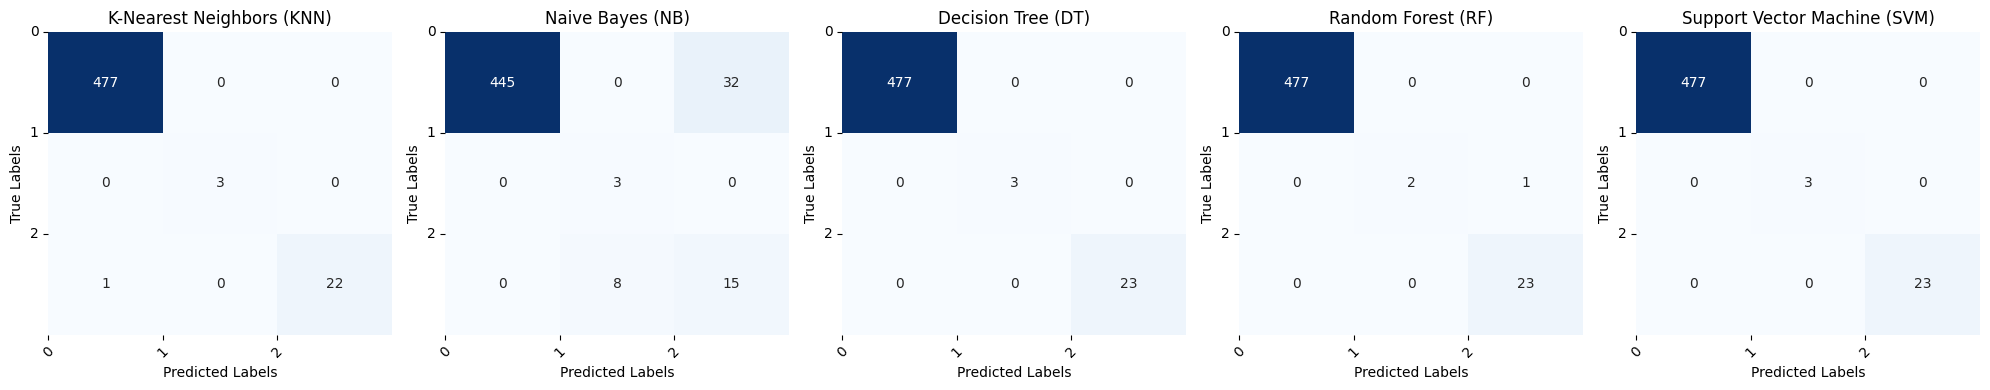

In [7]:
# Daftar model yang akan ditampilkan
models = ['K-Nearest Neighbors (KNN)', 'Naive Bayes (NB)', 'Decision Tree (DT)', 'Random Forest (RF)', 'Support Vector Machine (SVM)']

# Menentukan ukuran figure
fig, axes = plt.subplots(1, 5, figsize=(20, 4))  # 5 kolom untuk 5 model

for i, model in enumerate(models):
    ax = axes[i]

    # Mengambil confusion matrix model tertentu
    cm = results[model]['Confusion Matrix']

    # Plot heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax, xticklabels=True, yticklabels=True)

    # Menambahkan label dan judul
    ax.set_title(f'{model}')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.set_xticks(range(len(set(y_test))))
    ax.set_xticklabels(set(y_test), rotation=45)
    ax.set_yticks(range(len(set(y_test))))
    ax.set_yticklabels(set(y_test), rotation=0)

plt.tight_layout()
plt.show()

In [8]:
for model in models:
  print(f"Hasil evaluasi untuk {model}:")
  # Menghitung Precision dan Recall per kelas
  cm = results[model]['Confusion Matrix']
  precision_per_class = np.diag(cm) / np.sum(cm, axis=0)  # Diagonal / Sum of column
  recall_per_class = np.diag(cm) / np.sum(cm, axis=1)    # Diagonal / Sum of row

  # Tampilkan hasil
  for i, (precision, recall) in enumerate(zip(precision_per_class, recall_per_class)):
      print(f"Kelas {i}:")
      print(f"  Precision: {precision:.2f}")
      print(f"  Recall: {recall:.2f}")

  print("\n")

Hasil evaluasi untuk K-Nearest Neighbors (KNN):
Kelas 0:
  Precision: 1.00
  Recall: 1.00
Kelas 1:
  Precision: 1.00
  Recall: 1.00
Kelas 2:
  Precision: 1.00
  Recall: 0.96


Hasil evaluasi untuk Naive Bayes (NB):
Kelas 0:
  Precision: 1.00
  Recall: 0.93
Kelas 1:
  Precision: 0.27
  Recall: 1.00
Kelas 2:
  Precision: 0.32
  Recall: 0.65


Hasil evaluasi untuk Decision Tree (DT):
Kelas 0:
  Precision: 1.00
  Recall: 1.00
Kelas 1:
  Precision: 1.00
  Recall: 1.00
Kelas 2:
  Precision: 1.00
  Recall: 1.00


Hasil evaluasi untuk Random Forest (RF):
Kelas 0:
  Precision: 1.00
  Recall: 1.00
Kelas 1:
  Precision: 1.00
  Recall: 0.67
Kelas 2:
  Precision: 0.96
  Recall: 1.00


Hasil evaluasi untuk Support Vector Machine (SVM):
Kelas 0:
  Precision: 1.00
  Recall: 1.00
Kelas 1:
  Precision: 1.00
  Recall: 1.00
Kelas 2:
  Precision: 1.00
  Recall: 1.00




Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [9]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [10]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

1. Saya tidak melakukan tuning
2. Terdapat 5 model yang digunakan pada proyek ini sebagai berikut:
  - K-Nearest Neighbors (KNN): Memiliki precision dan recall tinggi untuk kelas 0 dan kelas 1 (1.00). Namun Recall untuk kelas 2 sedikit lebih rendah (0.96), yang berarti model masih melewatkan beberapa instance dari kelas ini. Model ini sudah mencapai best fit.
  - Naive Bayes (NB): Recall tinggi untuk kelas 1 (1.00), menunjukkan model menangkap semua instance dari kelas ini. Precision sangat rendah untuk kelas 1 (0.27) dan kelas 2 (0.32), yang menunjukkan banyak false positive. Selain itu, Recall kelas 2 juga rendah (0.65), yang berarti model gagal mengenali sebagian besar instance kelas ini. Model kemungkinan mengalami **underfitting**, karena tidak mampu menangkap pola kompleks untuk cluster yang bukan mayoritas.
  - Decision Tree (DT): Precision dan recall sempurna (1.00) untuk semua kelas, menunjukkan bahwa model mampu membedakan semua kategori dengan baik. Model ini sudah mencapai best fit.
  - Random Forest (RF): Precision dan recall tinggi untuk semua kelas. Lebih stabil dibanding Decision Tree karena menggunakan banyak pohon keputusan. Namun, Recall untuk kelas 1 lebih rendah (0.67), menunjukkan model gagal menangkap beberapa instance dari kelas ini. Bisa jadi mengalami **overfitting**, meskipun tidak separah Decision Tree.
  - Support Vector Machine (SVM): Precision dan recall sempurna (1.00) untuk semua kelas. Model inisudah mencapai best fit.
  3. Adapun rekomendasi lanjutan yang bisa saya berikan adalah sebagi berikut:
  - Jika model mengalami overfitting (RF):
    - Gunakan regularisasi.
    - Tambahkan cross-validation untuk menguji performa model pada berbagai subset data.
    - Coba mengurangi kompleksitas model, misalnya dengan membatasi kedalaman pohon pada Decision Tree atau mengatur jumlah estimators pada Random Forest.
    - Kumpulkan lebih banyak data untuk membantu model mengenali pola yang lebih umum.
  - Jika model mengalami underfitting (Naive Bayes):
    - Tambahkan lebih banyak fitur atau gunakan teknik feature engineering untuk memperkuat informasi dalam data.